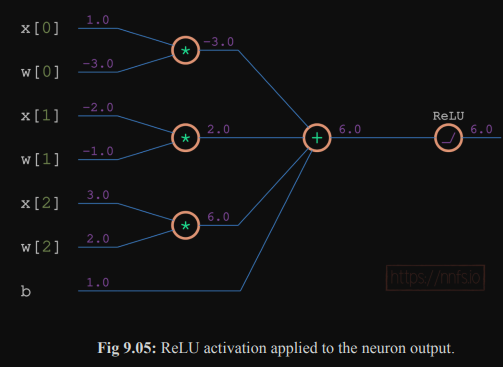

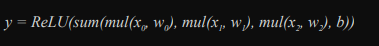

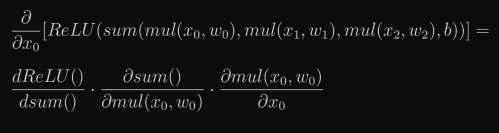

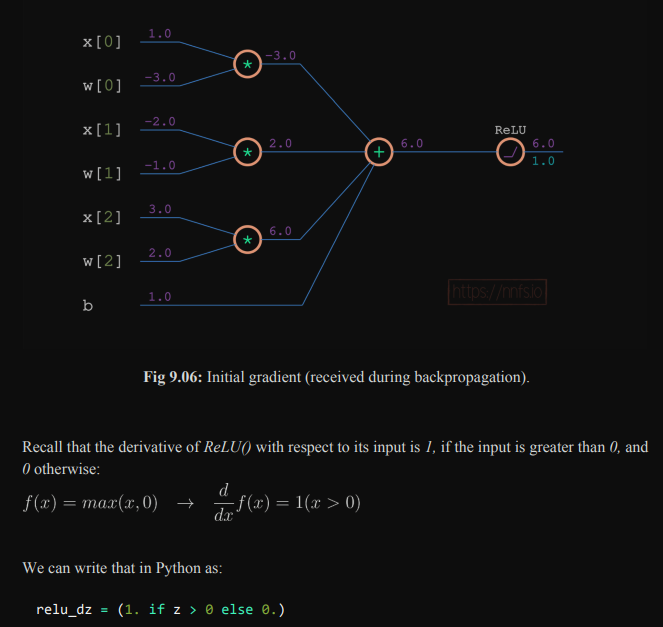

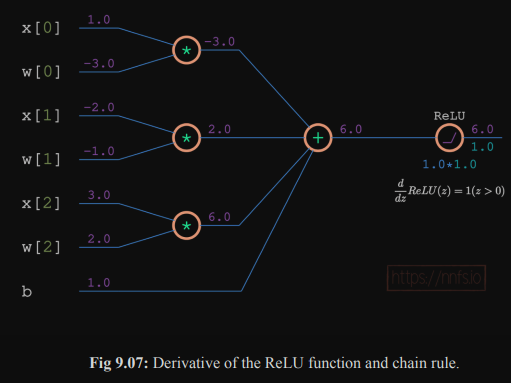

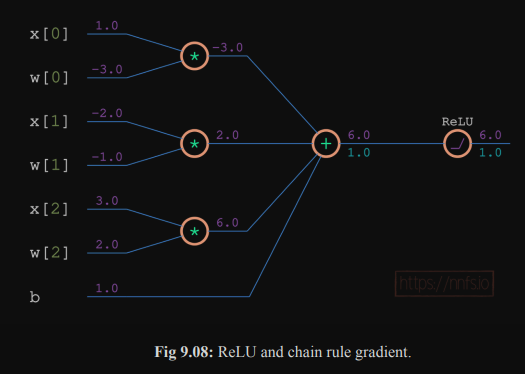

In [1]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print(drelu_dz)

1.0


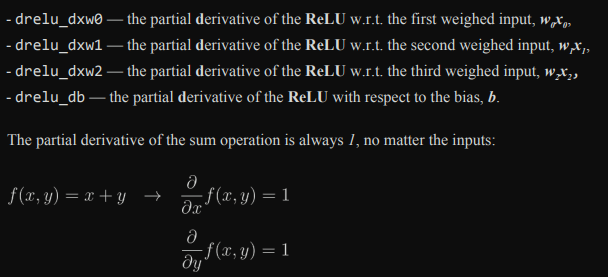

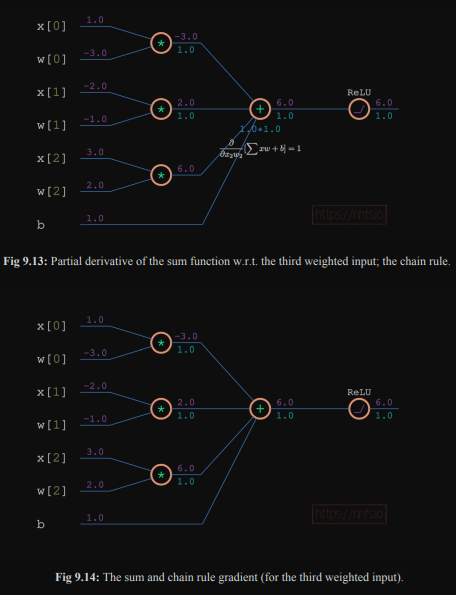

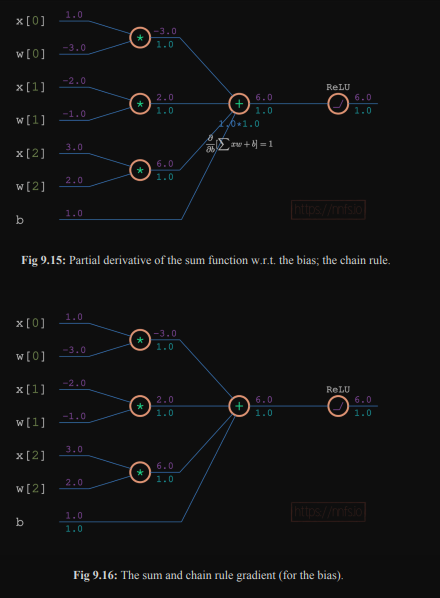

In [2]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

# Backward pass

# The derivative from the next layer
dvalue = 1.0

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)

print(drelu_dz)

# Partial derivatives of the multiplication, the chain rule
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1

drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print(drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)


1.0
1.0 1.0 1.0 1.0


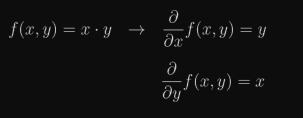

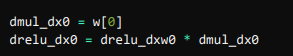

In [3]:
# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
drelu_dx0 = drelu_dxw0 * dmul_dx0
print(drelu_dx0)

-3.0


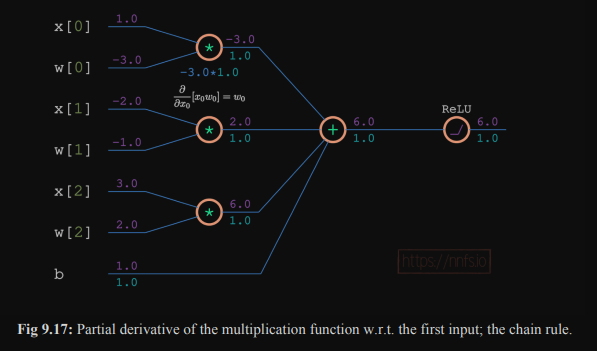

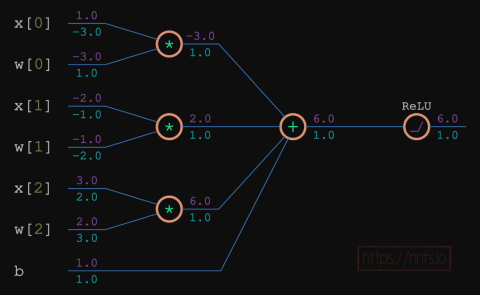

In [4]:
# Partial derivatives of the multiplication, the chain rule
dmul_dx0 = w[0]
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2
print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)


-3.0 1.0 -1.0 -2.0 2.0 3.0


# Gradient (Partial Derivative)

In [19]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias


In [20]:
print(w, b) # weights and bias

[-3.0059999999999993, -0.988, 1.9820000000000007] 0.994


In [29]:
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db

print(w,b)

# Adding
z = xw0 + xw1 + xw2 + b

# ReLU activation function
y = max(z, 0)

print(y) # 6 to 5.985


[-3.0149999999999983, -0.97, 1.9550000000000016] 0.985
5.985
